In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["LANGSMITH_API_KEY"] = "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"
os.environ["LANGSMITH_PROJECT"] = "CourseLangGraph"
os.environ["GROQ_API_KEY"] = "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"

In [7]:
groq_api_key = os.getenv("GROQ_API_KEY")

In [8]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000236F505D400>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000236F4F2CCB0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

### Start Building ChatBot Using LangGraph

In [9]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [10]:
from typing import List
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # In the annotation defines how this state key should be updated
    # (in the case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[List[str], add_messages]
graph_builder = StateGraph(State)

In [11]:
graph_builder

In [13]:
def chatbot(state:State):
    return {"messages": llm.invoke(state["messages"])} 

In [14]:
graph_builder.add_node("chatbot", chatbot)

In [15]:
graph_builder

In [16]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [17]:
graph = graph_builder.compile()

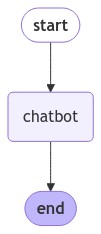

In [21]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [22]:
while True:
    user_input = input("User")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    for event in graph.stream({'messages': ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello! How can I help you today? 😊  \n', response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 3.7e-07, 'queue_time': 0.015476048000000001, 'total_time': 0.025454915}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f0eb0cb9-354c-4f53-9f1d-99036733be07-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})}])
content='Hello! How can I help you today? 😊  \n' response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 3.7e-07, 'queue_time': 0.015476048000000001, 'total_time': 0.025454915}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-f0eb0cb9-354c-4f53-9f1d-99036733be07-0' usage_metadata={'inp